<div class="alert alert-success">
<font size="4"><b>Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
    Привет, Дмитрий :) Спасибо, что прислал задание :) Меня зовут Ринат Хисамов и я буду проверять твой проект. Предлагаю обращаться друг к другу на ты. Так нам будет гораздо проще и удобней общаться

Мои комментарии обозначены пометкой <b>Комментарий ревьюера</b>. Далее в файле сможешь найти их в похожих ячейках (если фон комментария зелёный — всё сделано правильно (✔️), рекомендации таким же цветом. Отдельным цветом — блок ссылок (примеры ниже, 🍕). Оранжевым или светло желтым рекомендации, которые, хоть и не обязательны, но точно сделают ревью лучше. (⚠️); <u> красный комментарий</u>: код, график или вывод стоит переделать (❌)). 

Не удаляй все эти комментарии и постарайся учесть их в ходе выполнения данного проекта. 
Будет замечательно, если добавишь свои комментарии и пояснения✍
        
Поехали 🚀
    <br />
    </font>

</div>

<div style="border:solid steelblue 1px; padding: 20px">
    
<font size="4"><p style="text-align:center"><b>Примеры комментариев </b></p></font>
    
<div style="border:solid steelblue 3px; padding: 20px">
<font size="4"><b>🍕 Пример комментария - совета, здесь м.б. просто ссылка</b></font>
    <br /> 
        <font size="3", color = "black">
<br />
    Тут всего такого разного и вкусного :), есть способы прокачать проект визуализациями (ценит большинство "боссов")  <br /><br />
        <a href="https://devpractice.ru/matplotlib-book/">“Библиотека Matplotlib” доступна для скачивания БЕСПЛАТНО!</a>
        На сайте много полезных материалов, мне самому очень помогло в свое время, до сих пор подсматриваю :)


</div>
    
<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
    <font size="3"><b>⚠️ Пример оформления некритичного комментария</b>
    <br /> 
    <font size="2", color = "black">
<br />
    Рекомендации, которые, хоть и не обязательны, но точно сделают ревью лучше
    <br />
    </font>

</div>
    
<div class="alert alert-danger">
<font size="3"><b>❌ Пример оформления комментария к блоку(строке) программного кода (или выводу), который стоит переделать</b></font>
    <br /> 
    <font size="2", color = "black">
<br />
    Отправлен не тот проект, напиши в своих комментариях, что случилось? жду — <b>это пример</b>
    <br />
    </font>

</div>
    
<div class="alert alert-success">
<font size="4"><b>✔️ Пример оформления комментария, который нравится большинству студентов</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
    Круто, молодец, отлично, логично, или — 👌, 👍, или — выводы отвечают на все вопросы к данным и проекту
    <br />
    </font>

</div>

# Для твоих вопросов или комментариев оставлю такую ячейку, чтобы было удобнее взаимодействовать на проекте

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> ... , вот мой вопрос ...
        
        

# Спринт 3. Исследовательский анализ данных

## Постановка задачи:

1. Изучить, как быстро продавались квартиры
2. Определить какие факторы больше всего влияют на общую (полную) стоимость объекта?
3. Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра. 
4. Найти закономерность между стоимостью объектов зависит от расстояния до центра города.

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Перечень основных задач зафиксирован. 
        
        м.б. и главная задача у проекта поменялась, стоит уточнить  
        
Стоит уточнить название и  главную задачу проекта, добавить  краткое вступление в работу        

## Шаг 1. Загружаем dataframe

##### Импортируем датасет с помощью pandas

In [1]:
import pandas as pd #Подключаем pandas
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Молодец, что делишь блоки загрузки библиотек и датасета, в случае необходимости добавления новых библиотек не придется загружать весь датасет заново и перезапускать проект целиком

In [2]:
pth1 = 'datasets/real_estate_data.csv'
pth2 = 'https://code.s3.yandex.net/datasets/real_estate_data.csv' 

try:

    data = pd.read_csv(pth1, sep='\t')

except OSError as e:
    
    data = pd.read_csv(pth2, sep='\t') 

<div class="alert alert-danger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Кажется, работа над проектом велась локально и пути к файлам не были изменены на общедоступные. Стоит переписать код таким образом, что бы он запускался и в jupiter hub, и локально без внесения дополнительных правок. Этого можно добиться многими способами. Например, использовать конструкцию try-except для путей файлов: try — пути на локальном компьютере, except — пути на сервере. Или применить библиотеку os:
        
    import os

    pth1 = '/folder_1/data.csv'
    pth2 = '/folder_2/data.csv'

    if os.path.exists(pth1):
        query_1 = pd.read_csv(pth1)
    elif os.path.exists(pth2):
        query_1 = pd.read_csv(pth2)
    else:
        print('Something is wrong)

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
        Для подгрузки данных стоит использовать конструкцию try-except, она поможет избежать потенциальных ошибок при загрузке данных, связанных, например, с некорректным указанием путей

[Try - Except](https://pythonworld.ru/tipy-dannyx-v-python/isklyucheniya-v-python-konstrukciya-try-except-dlya-obrabotki-isklyuchenij.html)

##### Изучаем общую информацию о полученном файле**

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Описание столбцов:**  
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
balcony — число балконов  
ceiling_height — высота потолков (м)  
cityCenters_nearest — расстояние до центра города (м)  
days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
first_day_exposition — дата публикации  
floor — этаж  
floors_total — всего этажей в доме  
is_apartment — апартаменты (булев тип)  
kitchen_area — площадь кухни в квадратных метрах (м²)  
last_price — цена на момент снятия с публикации  
living_area — жилая площадь в квадратных метрах (м²)  
locality_name — название населённого пункта  
open_plan — свободная планировка (булев тип)  
parks_around3000 — число парков в радиусе 3 км  
parks_nearest — расстояние до ближайшего парка (м)  
ponds_around3000 — число водоёмов в радиусе 3 км  
ponds_nearest — расстояние до ближайшего водоёма (м)  
rooms — число комнат  
studio — квартира-студия (булев тип)  
total_area — общая площадь квартиры в квадратных метрах (м²)  
total_images — число фотографий квартиры в объявлении  

##### Видимые проблемы:

Очевидно, что в столбцах ceiling_height, floors_total, is_apartment, living_area, kitchen_area, balcony, locality_name, airports_nearest,  cityCenters_nearest, parks_around3000, ponds_nearest, days_exposition есть пропущенные значения

Так же столбцы is_apartment и floors_total явно имеют неправильный тип (должен быть bool и int). Дата публикации записана в виде строки, что может быть не удобно

##### Построим общую гистограмму для всех столбцов

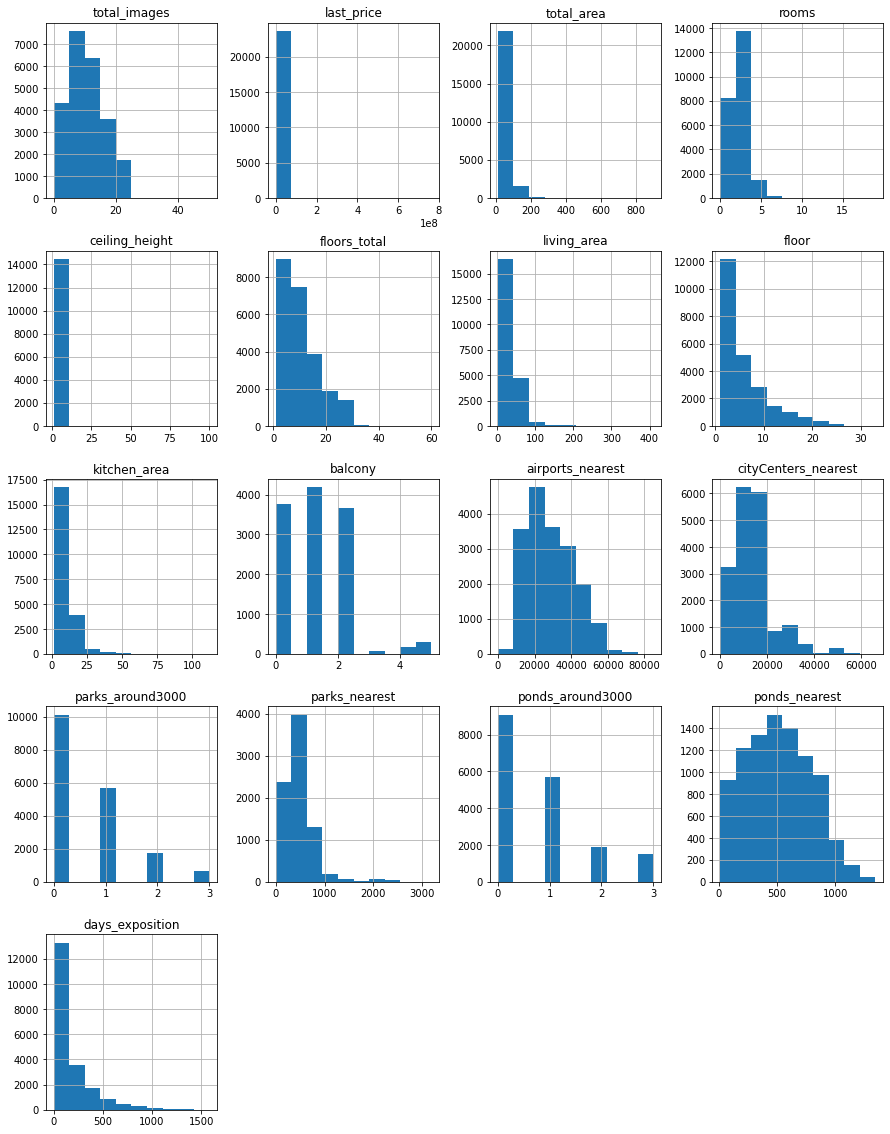

In [5]:
data.hist(figsize= (15, 20));

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br />
Убрать служ. информацию поможет точка с запятой на посл. строке кода

    array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

data.hist(figsize=(15, 20));


<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> загрузка и обзор данных проведены корректно

## Шаг 2. Предобработка данных

### 2.1. Заполнение NaN

прежде чем что-то делать переименуем столбец cityCenters_nearest в snake_case

In [6]:
data = data.rename(columns= {'cityCenters_nearest' : 'city_centers_nearest'})

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Красота стиля важна для серъезных проектов, молодец
          

В рамках предыдущего этапа мы определили предполагаемые столбцы с пропусками. Теперь проверим наше предположение

In [7]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

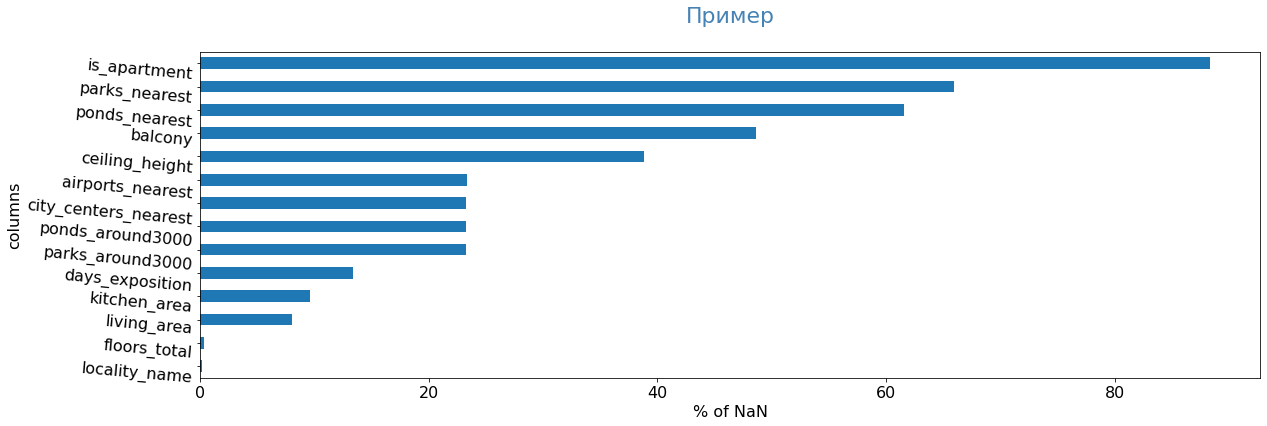

In [8]:
bar_plot = pass_value_barh(data)
plt.xlabel('% of NaN', fontsize = 16)
plt.ylabel('columns', fontsize = 16)
plt.show()

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br /> Наглядность представления информации одна из важных составляющих работы дата-аналитика или дата-сайентиста
    
мой график оформлен не совсем корректно, сможешь отметить, что стоило бы исправить в графике?
  

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Добавил подписи осей и самого графика

In [9]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### 2.1.1 Заполнение столбцов kitchen_area, living_area

В студиях нет кухни. Для студий можем заполнить NaN нулями. За студии (комнаты) будем считать также 

In [10]:
data.loc[((data['studio'] == True) | (data['rooms'] == 0))& (data['kitchen_area'].isna()), 'kitchen_area'] = 0

In [11]:
data.kitchen_area.isna().sum()

2070

208 студий или комнат убрали

Вероятно, что если жилплощадь и площадь кухни превышает 0,9 от суммарной площади, здесь явно есть ошибка. 
Так как для заполнения пропусков далее нам потребуются медианные значения, посмотрим количество таких ошибок

In [12]:
data[(data['living_area'] + data['kitchen_area']) > (0.9*data['total_area'])]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
41,16,7900000.0,74.0,2016-05-04T00:00:00,3,NaN,14.0,59.0,8,False,...,12.0,5.0,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
171,6,3800000.0,49.0,2019-02-22T00:00:00,2,2.50,9.0,38.0,8,NaN,...,10.0,1.0,посёлок Шушары,18471.0,24272.0,0.0,NaN,0.0,NaN,11.0
184,7,2600000.0,30.2,2018-02-14T00:00:00,1,2.65,9.0,26.1,5,NaN,...,6.2,NaN,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
220,8,3890000.0,37.0,2018-07-09T00:00:00,1,2.50,25.0,28.0,6,NaN,...,9.0,NaN,Санкт-Петербург,25408.0,16166.0,0.0,NaN,0.0,NaN,28.0
319,19,4850000.0,59.7,2015-03-19T00:00:00,3,2.50,5.0,47.4,4,NaN,...,6.4,1.0,Санкт-Петербург,43095.0,15599.0,0.0,NaN,0.0,NaN,974.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23216,15,10150000.0,114.0,2015-01-21T00:00:00,4,NaN,5.0,90.2,4,NaN,...,16.0,NaN,Санкт-Петербург,26259.0,4961.0,0.0,NaN,2.0,838.0,1052.0
23297,10,1850000.0,48.2,2019-03-13T00:00:00,2,NaN,5.0,42.2,2,NaN,...,6.0,1.0,Высоцк,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23328,12,4299000.0,54.0,2016-11-25T00:00:00,2,NaN,14.0,40.0,8,NaN,...,10.0,0.0,Колпино,25612.0,31399.0,0.0,NaN,0.0,NaN,343.0
23521,13,8500000.0,65.0,2018-11-01T00:00:00,2,NaN,4.0,44.0,2,NaN,...,15.3,NaN,Санкт-Петербург,22276.0,3996.0,1.0,627.0,0.0,NaN,NaN


469 значений !

Скорее всего жилплощадь получена вычитанием кухни из суммарной площади. Это не правильно, так как жилая площадь- это суммарная площадь только комнат (без корридоров и т.д)

Очевидно, что столбец living_area заполнен некорректно 

In [13]:
def corr_living_area(data:pd.DataFrame) -> pd.DataFrame:
    i = 0
    while i < len(data['living_area']):
        if (data.loc[i,'living_area'] + data.loc[i,'kitchen_area']) > (0.89 * data.loc[i,'total_area']):                     
                data.loc[i,'living_area'] = 0.89*data.loc[i,'total_area'] - data.loc[i,'kitchen_area']  
        i += 1
    return data   

In [14]:
corr_living_area(data);

In [15]:
data[(data['living_area'] + data['kitchen_area']) > (0.9 * data['total_area'])]  

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [16]:
area_median = data.pivot_table(index= 'total_area', values= ['kitchen_area', 'living_area'] , aggfunc='median') 

Остальные значения заполним медианными для суммарной площади. Для таких строчек значения жилой площади так же придется расчитывать вне зависимости от значения

In [17]:
def median_area(data:pd.DataFrame, area_median:pd.DataFrame, column1:str, column2:str, column3:str) -> pd.DataFrame:         
    i = 0
    while i < len(data[column3]):
        if mt.isnan(data.loc[i, column3]) == True:                
                data.loc[i, column3] = (area_median.loc[area_median.index == data.loc[30, column1] 
                                                                       ,column2].tolist()[0])
                
                data.loc[i, column2] = (0.85*data.loc[i ,column1] - data.loc[i ,column3])
        i += 1
    return data

In [18]:
data = median_area(data, area_median, 'total_area', 'living_area', 'kitchen_area')

In [19]:
data.kitchen_area.isna().sum()

0

Аналогично заполним оставшиеся пропуски в living_area

In [ ]:
data = median_area(data, area_median, 'total_area', 'kitchen_area', 'living_area')

In [ ]:
data.living_area.isna().sum()

Проверим количетво аномалий

In [ ]:
data[(data['living_area'] + data['kitchen_area']) > (0.9 * data['total_area'])]  

<div class="alert alert-danger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />После заполнения синтетическими данными столбцов, стоит провести проверку на корректность значений всех наших площадей, т.к. есть (коридоры, сан.узлы, балконы)
        
        total_area*0.9 <= (living_area + kitchen_area)
                                     
если алгоритм приводит к появлению аномалий, стоит подумать над его содержимым

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Заполнил медианными значениями не по комнатам а по суммарной площади. Аномалий нет

#### 2.1.2 Столбцы locality_name и balcony

В столбце локаций всего 49 пропусков. По сравнению с общим количеством этим можно принебречь

In [ ]:
# data = data.dropna(subset = 'locality_name').reset_index(drop= True)

data= data.dropna(subset= ['locality_name']).reset_index(drop= True)

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />  
        
     data = data.dropna(subset = 'locality_name').reset_index(drop= True)
        
Стоит использовать код, который не станет заложником версии.

Список лучше применять даже для одного столбца

    

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Ок. Применим dropna() только для одного столбца

Так же если не указано количество балконов, скорее всего их нет

In [ ]:
data['balcony'] = data['balcony'].fillna(0)

In [ ]:
data.balcony.isna().sum()

#### 2.1.3 Столбец floors

Проверим гипотезу, что если этаж не указан, значит в здании всего один этаж

In [ ]:
data[data['floor'] != 1].floor.isna().sum()

Гипотеза не подтвердилась. В столбце количества этажей всего 86 пропусков. По сравнению с общим количеством этим можно принебречь

In [ ]:
data = data.dropna(subset = ['floors_total']).reset_index(drop = True)
data['floors_total'].isna().sum()

####  2.1.4 Cтолбец is_appartament

***Гипотеза:*** Скорее всего пропуски в столбце is_apartament означают, что объект недвижимости не является апартаментами.

Для проверки данной гипотезы логично предположить, что практически все апартаменты находятся в Санкт-Петербурге.  
Для всех населенных пунктов кроме Спб сравним количество пропущенных значений в столбце is_appartament и количество записей об объявлениях

In [ ]:
not_in_spb = data.query('locality_name != "Санкт-Петербург"').is_apartment

print('Количество пропусков в столбце is_apartament вне спб, Количество записей о недвижимости вне спб:',
      not_in_spb.isna().sum(),',', len(not_in_spb))     

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Для красоты («продаваемости») всего проекта не стоит выходить за видимую ширину тетради юпитер ноутбука, коллеги ценят удобство прочтения кода. Широкие строки кода рекомендуется — делить <a href="https://qastack.ru/programming/53162/how-can-i-do-a-line-break-line-continuation-in-python">Перенос длинных строк кода</a>. 
    
</div>

In [ ]:
data.query('locality_name != "Санкт-Петербург"').is_apartment.count()

Всего 927 записей о статусе апартамены/не апартаменты в Ленинградской области !

Для того чтобы точно убедиться, среди данных записей посмотрим количество аппартаментов

In [ ]:
not_in_spb = data.query('is_apartment == True' and 'is_apartment.isna() != True' and 'locality_name != "Санкт-Петербург"')
print('Количество аппартаменов в Лен.области:',not_in_spb.is_apartment.sum())

Всего 11 аппартаментов по всей Ленинградской области. Из этого можно делать вывод, что если в столбце is_appartment стоит NAN, скорее всего объект недвижимости не является аппартаментами. Заполним пропуски значениями False

In [ ]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data.is_apartment.isna().sum()

#### 2.1.5. Столбцы parks_around3000 и ponds_around3000

Если есть расстояние до парков и водоёмов, логично предположить что по близости есть хотябы один парк. Поэтому заполним все строчки где есть расстояние до парка и водоема единицами.

In [ ]:
data[(data['parks_nearest'].isna() != True) & (data['parks_around3000'].isna() == True)].head()

In [ ]:
data[(data['ponds_nearest'].isna() != True) & (data['ponds_around3000'].isna() == True)].head()

Для всех столбцов где есть расстояние до парка и водоема, количество парков и водоемов уже заполнено.  
Можно предположить, что если парки или водоемы не указаны, их по близости нет

In [ ]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

**Вывод: Гипотеза верна. С данным столбцом мы ничего не сделаем**

In [ ]:
data.isna().sum()

#### 2.1.7 Столбец ceiling_height

Высоту потолков расчитаем медианное значение по категориям цены и местоположения.  
Для этого категоризируем стоимость квартир.

In [ ]:
data['last_price'].describe()

In [ ]:
for i in range(len(data)):
    if data.loc[i, 'last_price'] < 3e+06:
        data.loc[i, 'last_price_category'] = 'E'
    elif 3e+06 <= data.loc[i, 'last_price'] <= 4e+06:
        data.loc[i, 'last_price_category'] = 'D'
    elif 4e+06 <= data.loc[i, 'last_price'] <= 5e+06:
        data.loc[i, 'last_price_category'] = 'C'
    elif 5e+06 <= data.loc[i, 'last_price'] <= 6.79e+06:
        data.loc[i, 'last_price_category'] = 'B'
    elif data.loc[i, 'last_price']  > 6.79e+06:
        data.loc[i, 'last_price_category'] = 'А' 
    else:
        print(data.loc[i, 'last_price'])
        assert(False)   

Заполним медианными значениями по городу и цене

In [ ]:
for i in range(len(data['ceiling_height'])): 
    if mt.isnan(data.loc[i ,'ceiling_height']) == True :
        locality_name = data.loc[i ,"locality_name"]
        last_price_category = data.loc[i ,"last_price_category"]       
        data.loc[i ,'ceiling_height'] = data.query(('locality_name == @locality_name') and ('last_price_category ==@last_price_category')).ceiling_height.median()

In [ ]:
data.ceiling_height.isna().sum()

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />При заполнении средним или медианой необходимо четко отслеживать изменение других статистик: стандартное отклонение, дисперсию и другие параметры выборки
        
... если рассмотреть районность высоты потолков, т.к. в современных районах Питера высота потолков будет ожидаема ниже, чем в исторических, мы увидим, что заполнение подобного объема пропусков медианой или средним значением «размажет» это отличительное свойство объектов недвижимости в центре Питера
        
[Обработка пропусков в данных](https://loginom.ru/blog/missing)
        
Стоит оптимизировать алгоритм

        for i in range(len(data['ceiling_height'])): 
            if mt.isnan(data.loc[i ,'ceiling_height']) == True :
                locality_name = data.loc[i ,"locality_name"]
                last_price_category = data.loc[i ,"last_price_category"]
                data.loc[i ,'ceiling_height'] = data.query(('locality_name == @locality_name') and ('last_price_category ==@last_price_category')).ceiling_height.median()      
        
[Анти-паттерн №2: применение циклов for при работе с объектами pandas DataFrame](https://habr.com/ru/companies/wunderfund/articles/682388/)

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Центр города или элитная недвижимость в курортном районе (с соответствующей высотой потолков) безусловно будет лидером по ценам. Цена учитывается при заполнении потолков. Таким образом (по цене) считаем медиану по центру а не по всему городу

#### 2.1.8 Столбец days_exposition

Скорее всего 3171 объявление имеет пропуски в столбце days_exposition, так как они были закрыты в первый день. Логично данные пропуски заполнить нулями

In [ ]:
data['days_exposition'] = data['days_exposition'].fillna(0)

#### 2.1.9 Столбец city_centers_nearest

Заполним медианным для цены и города

Изучим распределение пропусков по городам

In [ ]:
def count_nan_cities(data:pd.DataFrame) -> pd.DataFrame:
    unique_cities =  data['locality_name'].unique()
    output =  pd.DataFrame(columns= ['locality_name', 'NaN_count'])
    for index, city in enumerate(unique_cities): 
        output.loc[index, 'locality_name'] = city
        output.loc[index, 'NaN_count'] = data[data['locality_name'] == city].city_centers_nearest.isna().sum()  
    return output 

In [ ]:
count_nan_cities(data)

В лидерах спб и пригороды. Для Санкт-Петербурга расстояние до центра является ключевым показателем. Для остальных городов заполнять нет смысла. Так же очевидно, что при заполнении медианными значениями требуется ориентироваться 

In [ ]:
for i in range(len(data['city_centers_nearest'])): 
    if (data.loc[i,'locality_name'] == 'Санкт-Петербург'):
        if mt.isnan(data.loc[i ,'city_centers_nearest']) == True:         
            last_price_category = data.loc[i ,"last_price_category"]
            data.loc[i ,'city_centers_nearest'] = data.query(('locality_name == Санкт-Петербург') and ('last_price_category ==@last_price_category')).city_centers_nearest.median()

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Сам алгоритм потребляет большое кол-во ресурсов, мы опрашиваем все 23 тысячи строк, это избыточное действие ...
        

<div class="alert alert-danger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Не изучено распределение пропусков по городам до заполнения значений в ['city_сenters_nearest']
        
к каким населенным пунктам они относятся и оценить степень влияния пропусков на дальнейший анализ (будут мешать или нет)
        

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> В спб конечно мешать будут. В остальных городах не критично. Немного оптимизировал алгоритм. Несмотря на то что он попрежнему смотрит все строчки, в большинстве он только проверяет город.

In [ ]:
data.isna().sum()

К сожалению, остальные столбцы мы не заполним

**Причина проблемы:** 

Пропуски данных связаны:

1. C человеческим фактором (пользователи не указывают определенные параметры)
2. C работой сайта, который воспринимает неуказанные параметры как NAN

### 2.2. Типы данных

Очевидно, что число этажей, количество балконов и количество дней с даты публикации не может быть дробным. Так же очевидно, что столбец is_apartment может принимать только 2 значения. Переведем данные столбцы в int и bool соответственно

In [ ]:
data['floors_total'] = data['floors_total'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['days_exposition'] = data['days_exposition'].astype(int)
data['is_apartment'] = data['is_apartment'].astype(bool)
data['rooms'] = data['rooms'].astype(int)

Значения даты публикации хранятся в строках. Лучше перевести их в DateTime

In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'] , format='%Y-%m-%dT%H:%M:%S.%f')

Дробным не может быть так же кроличество парков и водоемов

In [ ]:
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

Посмотрим на результат

In [ ]:
data.info()

**Причина проблемы:**

Некорректные типы данных связаны с ошибками в ПО (ошибки в конвертации/сборе информации на сайте)

### 2.3. Обработка дубликатов

По сути на явные и неявные дубликаты можно проверить только по столбцу локации

In [ ]:
data.locality_name.unique()

In [ ]:
data.locality_name.nunique()

In [ ]:
def delete_settlements (row :str) -> str:
    settlements  = (['посёлок', 'поселок',  'городского', 'типа', 'городской', 'деревня',
     'станции', 'Пансионат', 'садовое', 'товарищество', 'село', 'коттеджный', 'садоводческое', 'некоммерческое', 'при', 'железнодорожной'])
    for settlement in settlements:
        if settlement in row:
            row = row.replace(settlement, '').strip() 
    return row

In [ ]:
data.locality_name = data.locality_name.apply(delete_settlements).str.lower()

In [ ]:
data.locality_name.nunique()

59 дубликатов убрали

In [ ]:
data.locality_name.unique()

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Стоит  доработать 
        
        'садоводческое некоммерческое  лесная поляна', 
        
       'при железнодорожной  вещево',

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br />
    
Для того, __чтобы изменить лишь часть строки,__ можно добавить к коду — .str
    
        .str.replace('посёлок','поселок')

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.replace.html

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Стоит исследовать выборку
       
        
+ __на простое дублирование записей__
 + __особенно это станет важным, когда мы перейдем к более сложным задачам на втором модуле курса__
        
<br />  
        
+ дополнительно — на рабочих проектах стоит искать дубликаты по сумме ключевых параметров (подмножеству), для примера: 

 + общ. площадь квартиры,
 + этаж, 
 + общая этажность дома, 
 + расстояние до центра
 + название населенного пункта
 + кол-во комнат
    
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html?highlight=duplicat#pandas.DataFrame.duplicated
        
https://www.codecamp.ru/blog/pandas-find-duplicates/        

### 2.4. Обработка выбросов

Взглянем на данные

In [ ]:
data.reset_index(drop=True)
data.describe()

#### 2.4.1 Столбцы ceiling_height

In [ ]:
data['ceiling_height'].hist(bins=100, range=(0, 10));
data['ceiling_height'].value_counts()

Абсолютное большинство значений находится в диапазоне 2-4 метра, но минимальная высота потолков 1, а максимальная 100 м ? Здесь явно есть выбросы. Скорее всего здесь ошибка при вводе. Все что выше 10м будем делить на 10, предполагая что это ошибка записи десятичной дроби

In [ ]:
def ceiling_height_division(cealing_hight: float) -> float:
        if cealing_hight > 10:
            cealing_hight =cealing_hight / 10
        return cealing_hight 
            
data['ceiling_height'] = data['ceiling_height'].apply(ceiling_height_division)

Отбросим все потолки меньше 2м. Их всего 5 штук

In [ ]:
data = data[data['ceiling_height'] > 2]
data.ceiling_height.describe()

In [ ]:
data.info()

#### 2.4.2 Столбец floors_total

Максимальный этаж 33, а всего этажей 60 ? Здесь явно выброс

In [ ]:
data['floors_total'].hist(bins=100, range=(0, 60));
data['floor'].hist(bins=100, range=(0, 60));
data[data['floors_total'] > 33].floors_total.count()

Всего 30 значений. Ими явно можно пренебречь

In [ ]:
data = data[data['floors_total'] < 34]

In [ ]:
data.info()

#### 2.4.3 Столбцы kitchen_area и living_area

Жил площадь 0 - это явно выброс

In [ ]:
data['living_area'].hist(bins=100, range=(0, 60));

In [ ]:
data['living_area'].hist(bins=100, range=(0, 900));

Уберем объявления меньше 9 квадрат и больше 00

In [ ]:
data = data[(data['living_area'] > 9) & (data['living_area'] < 200)]
data.living_area.describe()

Аналогично в kitchen_area

уберем значения >30 м2 и от 1 до 4 

In [ ]:
data['kitchen_area'].hist(bins=100, range=(0, 60));
data[data['kitchen_area'] > 40].kitchen_area.count()

In [ ]:
data = data[data['kitchen_area'] < 30]
data = data[(data['kitchen_area'] > 4) | (data['kitchen_area'] == 0)]
data['kitchen_area'].hist(bins=100, range=(0, 60));

In [ ]:
data.info()

#### 2.4.4 Столбец days_exposition

Конечно возможно, что объявление висело 1580, но в основном столько они не висят

In [ ]:
data['days_exposition'].hist(bins=300, range=(0, 360));

Ограничимся 2 годами

In [ ]:
data[data['days_exposition'] > 1200].count()

In [ ]:
data = data[data['days_exposition'] < 1200]

<div class="alert alert-danger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />          
Выборка data['days_exposition'] имеет длинный правый хвост, не стоит обрезать подобный хвост на таких значениях, оптимально ориентироваться на значения 0,99 квантиля, это где-то 1200 дней ...
        
        data = data[data['days_exposition'] < 1000]

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Ок. Ставим 1200

Так же очень врядли объекты недвижимости продавались за 1 день. Уберем значения меньше 5 дней

In [ ]:
# check
data.shape[0]

<div class="alert alert-danger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Минус около 4000 записей
        
        data = data[data['days_exposition'] > 7]
        
мы сначала заполнили пропуски нулями, а затем удалили ...      
        
Пропуски в ['days_exposition'] говорят нам, что квартиры еще не проданы..., неверно терять эти записи, стоит их сохранить

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Ок. Удалил данную строку

In [ ]:
data.info()

#### 2.4.5 Столбец last_price

In [ ]:
data['last_price'].hist(bins=3000, range=(0,0.2e+08 ));

Скорее всего цены меньше 1 млн являются выбросами

In [ ]:
data = data[data['last_price']> 1e06]

In [ ]:
data.info()

Аналогично можно утвержадать что цены выше 1 млн/м2 для такой выборки так же выбросы

In [ ]:
data = data[data['last_price']/data['total_area'] < 1e06]

#### 2.4.6 Столбец rooms

Конечно бывают квартиры с 19-ю комнатами, но их количество несуществено. Уберем квартиры больше 7 комнат

In [ ]:
 data = data[data['rooms'] < 8]

#### 2.4.7 Столбец total_area	

Посмотрим сколько квартир имеют площадь > 250 м2

In [ ]:
data[data['total_area'] > 250].total_area.count()

Обрежем данный 'хвост'

In [ ]:
data = data[data['total_area'] < 300]

#### 2.4.7 Столбец ceiling_height

Посмотрим сколько квартир имеют высоту потолков > 4.5 м

In [ ]:
data[data['ceiling_height'] > 4.5].ceiling_height.count()

Обрежем данный 'хвост'

In [ ]:
data = data[data['ceiling_height'] < 4.5]

In [ ]:
# check
data.shape[0]

Удалили 1714 значений (7.2 %)


В остальных столбцах видимых выбросов нет. Значения в пределах логически обоснованых. Сбросим индексы после обработки

In [ ]:
data = data.reset_index(drop= True)

#### check gap

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />

__проверим какие аномалии остались__ таблица ниже

In [ ]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max', 'median'])   
    .style.format("{:,.2f}")    
)

<div class="alert alert-danger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />остались аномалии и редкости (в т.ч. и хвосты) в колонках: 
        
        'rooms', 'total_area', 'ceiling_height',   'last_price', 'living_area',  'kitchen_area' 
        
стоит обратить внимание на минимальные и максимальные значения в выборке и учесть наличие пропусков при фильтрации данных
        


<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Доп. задание, на твое усмотрение — сможешь добавить в таблицу расчет медианного значения?
        
        (
            data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
                  'floor', 'floors_total']]
            .apply (['count', 'min', 'max'])   
            .style.format("{:,.2f}")
        )

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> .apply (['count', 'min', 'max', 'median'])  ?

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Для выполнения пункта 2.4. существует два подхода
        
Можно механически бороться с выбросами, ...
               
основная проблема такого подхода — не учитывается неоднородность нашей выборки: у нас здесь и малые поселки, и вторая столица страны, и исторический фонд и массовая застройка, и однушки и довольно большое кол-во многокомнатных квартир, или наоборот одна две квартиры с количеством комнат больше 7-ми ...
        

        
если бы у нас в таблице были бы только однокомнатные квартиры из определенного района массовой застройки, тогда да, мы бы боролись с выбросами традиционными способами, при нашем многообразии населенных пунктов, многокомнатности такие подходы не работают... т.е. они работают, но это усложнит наш проект — придется разбить и объединить записи нашей таблицы по нескольким параметрам (кол-во комнат, район, и т.д.), а затем только выполнять все остальные пункты на каждой отдельной выборке
        
Остается другой подход — убираем редкие значения и следим за количеством потерь... 
         
Для выборки из 23-х тысяч значений, несколько записей со стоимостью квадратного метра выше 1-го млн. руб., довольно редкое явление

Хороший пример, высота потолков, которую мы отрезаем по нижней и верхней планке, это скорее аномальные записи, посмотрим на другой аспект — на редкости: кол-во комнат

__т.е. мы не говорим о том, что квартир с кол-ом комнат выше 7 не бывает, мы говорим, что для нашего исследования это редкие выбивающиеся из общей картины уникальные объекты, по которым необходимо проводить отдельную работу ...__
        
подобным образом рассматриваем и остальные параметры
        
наши помощники
        
1. гистограммы, с хорошим масштабом
2. метод describe() или облегченная версия, пример выше
3. метод value_counts()
        
плюс жизненный опыт 

In [ ]:
# check

try:
    df_check = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
# если не получилось прочитать файл из локальной папки, то загружаем данные из сети
except:
    df_check = pd.read_csv('real_estate_data.csv', sep='\t')

In [ ]:
# check
df_check.rooms.value_counts().to_frame()

In [ ]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3));

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />т.е. все квартиры менее 20-ти и более 250-ти квадратных метров можно считать редкостями
       

In [ ]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

In [ ]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

In [ ]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

<div class="alert alert-danger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Осталось завершить выполнение пункта 2.4 из брифа проекта

2.4.	Найдите и устраните редкие и выбивающиеся значения.
        
__Критичный уровень потерь записей на этапе предобработки составляет 10%, оптимальный 5%__
        
Если при фильтрации одной колонки, на этом проекте, теряем больше одного процента данных от изначального объема, стоит еще раз пересмотреть условия фильтрации        

In [ ]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера </b></font>
    <br /> 
    <font size="3", color = "black">
<br />Квантили что это такое (первая ссылка иногда не открывается)
        
https://fin-accounting.ru/cfa/l1/quantitative/cfa-quartiles-quintiles-deciles-percentiles?ysclid=l7gy2kky4i156375632
        
https://www.codecamp.ru/blog/percentile-vs-quartile-vs-quantile/?ysclid=lg89wjm4zz267333250        
        
они помогают увидеть редкости и аномалии в данных

## Шаг 3. Добавление столбцов

Добавим цену за м2

In [ ]:
data['square_meter_price'] =  data['last_price'] / data['total_area']

Добавим день публикации

In [ ]:
def week_day(time) -> int:
    return time.weekday()
data['week_day_exposition'] = data['first_day_exposition'].apply(week_day)

Добавим месяц публикации

In [ ]:
data['month_exposition'] = data['first_day_exposition'].dt.month

Добавим год публикации

In [ ]:
data['year_exposition'] = data['first_day_exposition'].dt.year

Добавим тип этажа публикации

In [ ]:
def floor_category(data:pd.DataFrame) -> pd.DataFrame:
    i = 0
    while i < len(data.floor):
        if data.loc[i,'floor'] == 1:
            data.loc[i, 'floor_type'] = 'first'
        elif data.loc[i,'floor'] == data.loc[i,'floors_total']:
            data.loc[i, 'floor_type'] = 'last'
        else:
            data.loc[i, 'floor_type'] = 'else'
        i +=1
    return data

In [ ]:
data = floor_category(data)

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Стоит оптимизировать алгоритм категоризации 
        
        i = 0
        while i < data.floor.count():
            if data.loc[i,'floor'] == 1:
                data.loc[i, 'floor_type'] = 'first'
            elif data.loc[i,'floor'] == data.loc[i,'floors_total']:
                data.loc[i, 'floor_type'] = 'last'
            else:
                data.loc[i, 'floor_type'] = 'else'
            i +=1    
                                     
оптимальнее применить функцию                                     

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Выделил в функцию

In [ ]:
# check
# пример функции
def divide_100 (df):
    
    row = df.total_images
    
    if row < 10:
        return row * 100
    else:
        return row / 10
    
data['total_images_100'] = data.apply(divide_100, axis = 1)
data['total_images_100'].head(4)

Добавим расстояние в км до центра города

In [ ]:
data['city_centers_nearest_km'] =  data['city_centers_nearest']/1000
data['city_centers_nearest_km'] = data[data['city_centers_nearest_km'].isna() == False].city_centers_nearest_km.apply(round)

**Результат:**

In [ ]:
data.sample(10)

## Шаг 4. Исследовательский анализ данных

### 4.1. Гистограммы

#### 4.1.1 Гистограмма общей площади

In [ ]:
data['total_area'].hist(bins= 500, range= (0,500), grid= True);
plt.xlabel('total_area', fontsize = 16)
plt.ylabel('frequency', fontsize = 16)
data['total_area'].describe()

In [ ]:
data['total_area'].hist(bins= 100, range= (0,120), grid= True);
plt.xlabel('total_area', fontsize = 16)
plt.ylabel('frequency', fontsize = 16)

**Вывод:** Площадь объектов недвижимости находится в диапазоне от 9 до ~630м2. Большинство объектов недвижимости (межквартильный интервал) имеют площадь от 40 до 68 м2. Средняя площадь - 58 м2. С оговорками можно сказать, что гистограмма имеет характер нормального распределения с отклонением в сторону квартир площадью 30-60 м2, что объясняется востребованостью таких квартир

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Хорошие графики, можно  изменить размер у графиков (увеличить ширину)

Подписи осей на графиках и название добавят ясности и читабельности.
Это важные элементы любой визуализации. Как добавить подписи и названия, смотри [здесь](https://proproprogs.ru/modules/matplotlib-razmeshchaem-standartnye-tekstovye-elementy-na-grafike?ysclid=l6agtioc6f299002507)

#### 4.1.2 Гистограмма жилой площади

In [ ]:
data['living_area'].hist(bins= 100, range= (0,150), grid= True);
plt.xlabel('living_area', fontsize = 16)
plt.ylabel('frequency', fontsize = 16)
data['living_area'].describe()

**Вывод:** Жилая площадь объектов недвижимости находится в диапазоне от 9 до 195м2. Большое количество около минимального значения объясняется тем, что в комнатах и студиях нет кухни (практически вся площадь - жилая).Большинство объектов недвижимости (межквартильный интервал) имеют жилую площадь от 18 до 42 м2. Средняя жилая площадь - ~34 м2. Имеются пики в области публикаций до 20 м2 и 25-30 м2.

#### 4.1.2 Гистограмма площади кухни

In [ ]:
data['kitchen_area'].hist(bins= 100, range= (0,50), grid= True);
plt.xlabel('kitchen_area', fontsize = 16)
plt.ylabel('frequency', fontsize = 16)
data['kitchen_area'].describe()

**Вывод:** Площадь кухни объектов недвижимости находится в диапазоне от 4 до ~29м2. Большое количество около нуля объясняется тем, что в комнатах и студиях нет кухни. Большинство объектов недвижимости (межквартильный интервал) имеют площадь кухни от 7 до ~13 м2. Средняя площадь кухни - 10,5 м2. В целом, по частоте некоторых значений можно утверждать, что самыми распространенными являются кухни площадью от 7 до 12 м2

#### 4.1.3 Гистограмма цены объекта

In [ ]:
print(data['last_price'].describe())
data['last_price'].hist(bins= 200, range= (1e+04,0.2e+08), grid= True);
plt.xlabel('last_price', fontsize = 16)
plt.ylabel('frequency', fontsize = 16)

**Вывод:** Цена объектов недвижимости находится в диапазоне от 1 млн до 2.45 млрд . Большинство объектов недвижимости (межквартильный интервал) имеют стоимость от 3,5 млн до 6.6 млн. В целом распределение на данном участке можно считать нормальным

#### 4.1.4 Гистограмма количества комнат

In [ ]:
print(data['rooms'].describe())
data['rooms'].hist(bins= 25, range= (0,8), grid= True);
plt.xlabel('rooms', fontsize = 16)
plt.ylabel('frequency', fontsize = 16)

**Вывод:** Количество комнат объектов недвижимости находится в диапазоне от 0 до 7. Значения около нуля объясняются студиями и отдельными комнатами. Большинство объектов недвижимости (межквартильный интервал) имеют количество комнат от 1 до 3 В целом распределение комнат на участке от 1 до 3 можно считать нормальным.

<div class="alert alert-danger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br />
    <font size="3", color = "black">
<br />  Стоит изменить параметры отображения гистограммы (добавить корзин), сейчас трудно определить типовое кол-во комнат

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Увеличил

#### 4.1.5 Гистограмма высоты потолков

In [ ]:
print(data['ceiling_height'].describe())
data['ceiling_height'].hist(bins= 100, range= (1,5), grid= True);
plt.xlabel('ceiling_height', fontsize = 16)
plt.ylabel('frequency', fontsize = 16)

**Вывод:** Высота потолков объектов недвижимости находится в диапазоне от 2 до 4.5 м. Большинство объектов недвижимости (межквартильный интервал) имеют высоту потолков от 2.5 до 2.76. Большое количество потолков выотой 2,5 и 2,7м объяснятется массовым строительством жил плозади с данной высотой потолков в прошлом 

#### 4.1.6 Гистограмма этажа квартиры

In [ ]:
print(data['floor'].describe())
data['floor'].hist(bins= 70, range= (0,35), grid= True)
plt.xlabel('floor', fontsize = 16)
plt.ylabel('frequency', fontsize = 16)

**Вывод:** Этаж квартиры объектов недвижимости находится в диапазоне от 1 до 32. Большинство объектов недвижимости (межквартильный интервал) находится на этаже от 3 до 8-ого. Самые частые - от 2-ого до 5-ого

#### 4.1.7 Гистограмма типа этажа квартиры

In [ ]:
print(data['floor_type'].describe())
data['floor_type'].hist(bins= 19, range= (0,3), grid= True)
plt.xlabel('floor_type', fontsize = 16)
plt.ylabel('frequency', fontsize = 16)

**Вывод:** Естестественно большое всего объявлений ни с первого и последнего этажа

#### 4.1.8 Гистограмма общего количества этажей в доме

In [ ]:
print(data['floors_total'].describe())
data['floors_total'].hist(bins= 80, range= (0,35), grid= True);
plt.xlabel('floors_total', fontsize = 16)
plt.ylabel('frequency', fontsize = 16)

**Вывод:** Общее количество этажей объектов недвижимости находится в диапазоне от 1 до 33. Большинство объектов недвижимости (межквартильный интервал) имеет количество этажей от 5 до 16-ого. Самые частые - 5-ти, 9-ти, 6-ти и 12-ти этажки

<div class="alert alert-danger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />          
Стоит изменить параметры отображения гистограммы (добавить корзин), сейчас  трудно определить типовую высотность зданий

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Увеличил

#### 4.1.9 Гистограмма расстояния до центра города в метрах

In [ ]:
print(data['city_centers_nearest'].describe())
data['city_centers_nearest'].hist(bins= 200, range= (0,50000), grid= True);
plt.xlabel('city_centers_nearest', fontsize = 16)
plt.ylabel('frequency', fontsize = 16)

**Вывод:** Расстояния до центра города объектов недвижимости находится в диапазоне от 181м до 66км. Большинство объектов недвижимости (межквартильный интервал) находится на расстоянии от центра города от 9,6 км до 16 км. Распределение на данном интервале можно считать нормальным.

#### 4.1.10 Гистограмма расстояния до расстояние до ближайшего аэропорта

In [ ]:
print(data['airports_nearest'].describe())
data['airports_nearest'].hist(bins= 200, range= (0,60000), grid= True);
plt.xlabel('airports_nearest', fontsize = 16)
plt.ylabel('frequency', fontsize = 16)

**Вывод:** От аэропорта до объектов недвижимости находится в диапазоне от 9 до 85км. Большинство объектов недвижимости (межквартильный интервал) находится на расстоянии от аэропорта до объекта недвижимости от 18,43 км до 37 км. 

#### 4.1.11 Гистограмма расстояния до расстояние до ближайшего парка

In [ ]:
print(data['parks_nearest'].describe())
data['parks_nearest'].hist(bins= 150, range= (0,2000), grid= True);
plt.xlabel('parks_nearest', fontsize = 16)
plt.ylabel('frequency', fontsize = 16)

**Вывод:** От ближайшего парка до объектов недвижимости находится в диапазоне от 21м до 3км. Большинство объектов недвижимости (межквартильный интервал) находится на расстоянии от парка до объекта недвижимости от 300 м до 600 м. Такие значения объясняются тем что скорее всего, если до парка больше 1,5 км - считается что парка по близости нет

#### 4.1.11 Гистограмма расстояния до расстояние до ближайшего водоема

In [ ]:
print(data['ponds_nearest'].describe())
data['ponds_nearest'].hist(bins= 19, range= (0,2000), grid= True)
data['ponds_nearest'].value_counts()

**Вывод:** От ближайшего водоема до объектов недвижимости находится в диапазоне от 22м до 1,4 км. Большинство объектов недвижимости (межквартильный интервал) находится на расстоянии от водоема до объекта недвижимости от 276 м до 712 м. Такие значения объясняются тем что скорее всего, если до водоема больше 1,25 км - считается что водоема по близости нет

#### 4.1.12 Гистограмма типа этажа квартиры («первый», «последний», «другой»);

In [ ]:
print(data['floor_type'].describe())
data['floor_type'].hist(bins= 19, range= (0,3), grid= True);
plt.xlabel('floor_type', fontsize = 16)
plt.ylabel('frequency', fontsize = 16)

**Вывод:** Естественно, по количеству лидируют не первые и не последние этажи

#### 4.1.13 Гистограмма дня публикации объявления

In [ ]:
print(data['week_day_exposition'].describe())
data['week_day_exposition'].hist(bins= 50, range= (0,6), grid= True);
plt.xlabel('week_day_exposition', fontsize = 16)
plt.ylabel('frequency', fontsize = 16)

**Вывод:** В выходные объявлений выкладывается меньше, что логично. По будням существенных различий нет

#### 4.1.14 Гистограмма месяца публикации

In [ ]:
print(data['month_exposition'].describe())
data['month_exposition'].hist(bins= 50, range= (1,12), grid= True);
plt.xlabel('month_exposition', fontsize = 16)
plt.ylabel('frequency', fontsize = 16)

**Вывод:** Периоды наибольшей активности: февраль-апрель, сентябрь-ноябрь. Это объясняется праздниками и летними отпусками

<div class="alert alert-danger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />          
Осталось добавить пару гистограмм из 14-ти обязательных
        
Шаг 4. Проведите исследовательский анализ данных:
1.	Изучите следующие параметры объектов:
    +	общая площадь;
    +	жилая площадь;
    +	площадь кухни;
    +	цена объекта;
    +	количество комнат;
    +	высота потолков;
    +	этаж квартиры;
    +	тип этажа квартиры («первый», «последний», «другой»);
    +	общее количество этажей в доме;
    +	расстояние до центра города в метрах;
    +	расстояние до ближайшего аэропорта;
    +	расстояние до ближайшего парка;
    +	день и месяц публикации объявления.


__Постройте отдельные гистограммы для каждого из этих параметров.__ Опишите все ваши наблюдения по параметрам в ячейке с типом markdown.        

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Построил гистограмы для типа этажа, дня и месяца публикации

### 4.2. Анализ

### 4.2.1 Как быстро продавались квартиры ?

In [ ]:
data.days_exposition.hist(bins= 300, range= (0,500), grid= True);
plt.xlabel('days_exposition', fontsize = 16)
plt.ylabel('frequency', fontsize = 16)
data.days_exposition.agg({'mean', 'median'})

In [ ]:
data.days_exposition.describe()

In [ ]:
data[data['days_exposition'] < 45].sort_values(by= 'days_exposition')

**Вывод:** В среднем (по межквартильному размаху) квартиры продаются от 0 до 1199 дней. Медианное значение - 151 дней.  Быстрыми считаются продажи < 23 дней. Долгими > 196 дней

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />

        
__Интересно посмотреть на изменение средней  скорости продаж по годам__

In [ ]:
(data
 .groupby('year_exposition')
 .mean()
 .reset_index(drop= False)
 .plot.bar(x= 'year_exposition', y= 'days_exposition', grid =True) 
);
plt.xlabel('years', fontsize = 16)
plt.ylabel('days_exposition', fontsize = 16)


**Вывод:** Наблюдается существенное уменьшение времени продажи квартиры

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />         
Не исследованы моды (пиковые значения) в 'days_exposition' и как они влияют на скорость продажи, подсказка на что смотреть
        
[Условия размещения объявлений](https://yandex.ru/support/realty/owner/home/add-ads-housing.html)

In [ ]:
print('самая долгая продажа:', data['days_exposition'].max())

In [ ]:
print('самая быстрая:', data['days_exposition'].min())

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />   Для определения быстрых и долгих продаж оптимальнее ориентироваться на 25-тый и 75-тый квантили

### 4.2.2 Какие факторы больше всего влияют на общую (полную) стоимость объекта? 

Построим матрицу корреляции

In [ ]:
corr = data.corr().round(3)
corr.style.background_gradient(cmap='coolwarm')

###### Корреляции к last_price:

        - общей площади : 0.639000
        - жилой площади : 0.569000
        - площади кухни : 0.381000
        - количество комнат : 0.386000         
        - даты размещения (день недели) : 0.005000
        - даты размещения (месяц): -0.016000
        - даты размещения (год): -0.025000

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Коэффициент корреляции рассчитывается для всех зависимостей из задания, исключая параметры - день недели и месяц — это не эффективно, т.к. это нелинейные параметры
        
чтобы они стали линейными, январь месяц 2015 года должен стать третьим и т.д., т.е. мы должны сделать перекодировку ...

Теперь посмотрим зависимость между средней ценой и типом этажа 

In [ ]:
list1 = ['else',data[data['floor_type'] == 'else'].last_price.median()/1e06]
list2 = ['first',data[data['floor_type'] == 'first'].last_price.median()/1e06]        
list3 = ['last',data[data['floor_type'] == 'last'].last_price.median()/1e06]      
floor_type_price = pd.DataFrame([list1, list2, list3], columns= ['floor_type', 'median_price'])
floor_type_price.head()

In [ ]:
data[data['floor_type'] == 'else'].last_price.count()

In [ ]:
data[data['floor_type'] == 'first'].last_price.count()

In [ ]:
data[data['floor_type'] == 'last'].last_price.count()

In [ ]:
sns.barplot(data= floor_type_price, x='floor_type', y='median_price');

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Импорт библиотек стоит выносить на первые строки проекта, так коллегам будет удобнее настроить свои рабочие места под наши требования

**Графики**

Общая площадь-стоимость

In [ ]:
total_area_last_price = data.pivot_table(index= 'total_area', values= 'last_price').reset_index(drop = False)
total_area_last_price.plot(x= 'total_area', y='last_price', kind= 'scatter'); 

Жилая площадь-полная стоимость

In [ ]:
living_area_last_price = data.pivot_table(index= 'living_area', values= 'last_price').reset_index(drop = False)
living_area_last_price.plot(x='living_area', y='last_price' ,kind= 'scatter');

Площадь кухни-полная стоимость

In [ ]:
kitchen_area_last_price = data.pivot_table(index= 'kitchen_area', values= 'last_price').reset_index(drop = False)
kitchen_area_last_price.plot(x='kitchen_area', y='last_price' ,kind= 'scatter');

Количество комнат-полная стоимость

In [ ]:
rooms_total_price = data.pivot_table(index= 'rooms', values= 'last_price', aggfunc= 'median').reset_index(drop = False)
(sns.barplot(data= rooms_total_price , x='rooms', y='last_price')
);
plt.title('price-rooms_type')
plt.show()

Тип этажа-полная стоимость

In [ ]:
floor_last_price = data.pivot_table(index= 'floor_type', values= 'last_price', aggfunc= 'median').reset_index(drop = False)
(sns.barplot(data= floor_last_price , x='floor_type', y='last_price')
);
plt.title('price-floor_type')
plt.show()

День недели размещения - полная стоимость

In [ ]:
day_last_price = data.pivot_table(index= 'week_day_exposition', values= 'last_price', aggfunc= 'median').reset_index(drop = False)
(sns.barplot(data= day_last_price , x='week_day_exposition', y='last_price')
);
plt.title('week_day_exposition-floor_type')
plt.show()

Месяц размещения -полная стоимость

In [ ]:
month_last_price = data.pivot_table(index= 'month_exposition', values= 'last_price', aggfunc= 'median').reset_index(drop = False)
(sns.barplot(data= month_last_price , x='month_exposition', y='last_price')
);
plt.title('month-floor_type')
plt.show()

Год размещения -полная стоимость

In [ ]:
year_last_price = data.pivot_table(index= 'year_exposition', values= 'last_price', aggfunc= 'median').reset_index(drop = False)
(sns.barplot(data= year_last_price , x='year_exposition', y='last_price')
);
plt.title('year-floor_type')
plt.show()

In [ ]:
year_last_price.plot(x= 'year_exposition', y='last_price', kind= 'line', grid= True);
plt.xlabel('year_exposition', fontsize = 16)
plt.ylabel('last_price', fontsize = 16)

In [ ]:
Расстояние до центра -полная стоимость

In [ ]:
center_distance_last_price = data.pivot_table(index= 'city_centers_nearest_km', values= 'last_price').reset_index(drop = False)
center_distance_last_price.plot(x='city_centers_nearest_km', y='last_price' ,kind= 'line');
plt.xlabel('city_centers_nearest_km', fontsize = 16)
plt.ylabel('last_price', fontsize = 16)

**Вывод:**

На цену объекта недвижимости влияют:     
  
        - общая площадь (соответствено и жилая площадь, площадь кухни, количество комнат и цена м2)  
        - расстояние от центра 
        - год продажи 

День и месяц практически не влияют на цену. В 2016-2018 годах наблюдается существенное снижение цен. Не смотря на то, что медианная цена на квартиры не на последнем и первом этаже больше, количество квартир на первом и последнем этажах мало, что не позволяет делать однозначный вывод

<div class="alert alert-danger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Стоит добавить 7 графиков для выполнения пункта 4.3 проекта, коэф. корреляции отображает лишь возможное наличие линейной связи    
        
Шаг 4. Проведите исследовательский анализ данных:

3.	Какие факторы больше всего влияют на общую (полную) стоимость объекта?
    Изучите, зависит ли цена от:
    +	общей площади;
    +	жилой площади;
    +	площади кухни;
    +	количества комнат;
                                    +	этажа, на котором расположена квартира (первый, последний, другой);
    +	даты размещения (день недели, месяц, год).
    
Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

        
        
Советы по графикам:
        
+ зависимость параметров (от площади, удалённости от центра) оптимальнее рассматривать на точечных графиках (тип scatter),
+ динамику на линейных (это про сравнение цен за год, месяц, день недели), — стоит сгруппировать значения и рассчитать среднее или медианное значение 
+ сравнение цен на барах (для сравнение средней стоимости квартиры по трем категориям), — стоит сгруппировать значения и рассчитать среднее или медианное значение

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br />  Можно попробовать настроить вид точечных графиков      
    
[Как сделать диаграмму рассеяния из фрейма данных Pandas](https://www.codecamp.ru/blog/pandas-scatter-plot/?ysclid=lh0tbpkoa9628147030)
    
Примеры расчета коэф. корреляции и не только
        
[Исследуем отношение между переменными](https://dfedorov.spb.ru/pandas/downey/%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D1%83%D0%B5%D0%BC%20%D0%BE%D1%82%D0%BD%D0%BE%D1%88%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%BC%D0%B5%D0%B6%D0%B4%D1%83%20%D0%BF%D0%B5%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8.html?ysclid=l9ev0utyg728177057)

<div class="alert alert-danger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Стоит дополнить  вывод об изменении цен по годам, необходимо учесть другие факторы, которые также изменяются с годами: площадь и кол-во объявлений о продаже (стоит добавить или графики, или сводные таблицы и исследовать взаимное влияние параметров: кол-во записей и изменение средней цены и средней площади в течение лет)

### 4.2.3 Расчитаем среднюю стоимость м2 

In [ ]:
median_price = (
 data
 .pivot_table(index= 'locality_name', values= ['square_meter_price'], aggfunc= ['median', 'count'])
 .reset_index(drop = False) 
)
median_price.columns = ['locality_name', 'median_square_meter_price', 'count'] 

median_price = median_price.sort_values(by= 'count', ascending = False).head(10)

median_price['median_square_meter_price'] = (
  median_price['median_square_meter_price'] 
 .apply(round)
)

Строим график

In [ ]:
(sns.barplot(data= median_price.sort_values(by= 'median_square_meter_price', 
                                            ascending = False) , x='median_square_meter_price', y='locality_name')
);
plt.title('Median_price_of_a_square_meter')
plt.show()

**Вывод:**

В лидерах по цене квадратного метра Санкт-Петербург и пригороды

<div class="alert alert-danger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />  Осталось пересчитать: сначала составляем список из десяти населенных пунктов в которых наибольшее кол-во объявлений, затем рассчитываем среднюю  стоимость кв. м. по населенным пунктам из полученного списка, затем строим график (бары), чтобы наглядно показать разницу в средней цене кв. метра ...
        
Шаг 4. Проведите исследовательский анализ данных:

4.	Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.
        
        


<div class="alert alert-danger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Недостаточно найти числа, стоит их показать красиво, удобно и наглядно, чтобы одного взгляда хватило, где самые самые, а где подешевле 📊

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br />         
    
[Постер поможет выбирать вид графиков](https://www.notion.so/6c5ae8ceb8b5411e907c93c9b5e6a44e)

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> на проектах стоит снижать размерность выводимой информации, где не требуется максимальная точность, до одного или двух знаков после запятой
        
       кудрово             95026.041667

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Пересчитал и добавил график

### 4.2.3 Расчитаем стоимость "километра" в Спб

Расчитает расстояние в километрах от центра до самого дальнего объекта недвижимости 

In [ ]:
spb = data[data['locality_name'] == 'санкт-петербург']

In [ ]:
max_km = spb.city_centers_nearest_km.max()
max_km

In [ ]:
zero_km_price = spb[spb['city_centers_nearest_km'] == 0].last_price.median()
max_km_price =  spb[spb['city_centers_nearest_km'] == 29].last_price.median()
difference_km_price = zero_km_price - max_km

In [ ]:
difference_km_price/1e5 

C приближением к центру города стоимость квартиры увеличивается в среднем на ~125 тыс.руб за 1 км

In [ ]:
spb_km_price = spb.groupby('city_centers_nearest_km').median().reset_index(drop= False)

In [ ]:
spb_km_price.plot(x= 'city_centers_nearest_km', y='square_meter_price', kind= 'line', grid= True);
plt.xlabel('city_centers_nearest_km', fontsize = 16)
plt.ylabel('square_meter_price', fontsize = 16)

Посмотрим чем вызван всплеск на 27 км

In [ ]:
spb[spb['city_centers_nearest_km'] == 27]

Двухкомнатная квартира на 74 м2 видимо находится в элитной новостройке. Уберем данное значение как выброс

In [ ]:
spb.loc[spb['city_centers_nearest_km'] == 27, 'city_centers_nearest_km'] = spb.query('city_centers_nearest_km == 26')

In [ ]:
spb_km_price = spb.groupby('city_centers_nearest_km').median().reset_index(drop= False)

In [ ]:
spb_km_price.plot(x= 'city_centers_nearest_km', y='square_meter_price', kind= 'line', grid= True);
plt.xlabel('city_centers_nearest_km', fontsize = 16)
plt.ylabel('square_meter_price', fontsize = 16)

Скорее всего пик и провал в центре вызваны количеством квартир на первом и последним этажах на данных километрах

In [ ]:
spb3_km = spb[spb['city_centers_nearest_km'] == 3].groupby('floor_type').count()
spb5_km = spb[spb['city_centers_nearest_km'] == 5].groupby('floor_type').count()
spb10_km =spb[spb['city_centers_nearest_km'] == 10].groupby('floor_type').count()

In [ ]:
sns.barplot(data= spb3_km, x= spb3_km.index, y='rooms');
plt.xlabel('number_of_publications', fontsize = 16)
plt.ylabel('floor_type', fontsize = 16)
plt.title('3km')
plt.show()

In [ ]:
sns.barplot(data= spb5_km, x= spb5_km.index, y='rooms');
plt.xlabel('number_of_publications', fontsize = 16)
plt.ylabel('floor_type', fontsize = 16)
plt.title('5km')
plt.show()

In [ ]:
sns.barplot(data= spb10_km, x= spb10_km.index, y='rooms');
plt.xlabel('number_of_publications', fontsize = 16)
plt.ylabel('floor_type', fontsize = 16)
plt.title('10_km')
plt.show()

На 3-ем километре квартир в категориях "первый этаж " или "последний этаж " заметно больше. Этим объясняется провал
На 5-ом километре квартир в категории "другой" больше. Этим объясняется всплеск

<div class="alert alert-danger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
        
Для выполнения 5-го пункта стоит сгруппировать и найти среднюю стоимость только питерских квартир на каждом километре, на этих данных построить линейный график, где по оси х будут округленные км., а по оси у - средняя стоимость всех квартир на этом км.
        
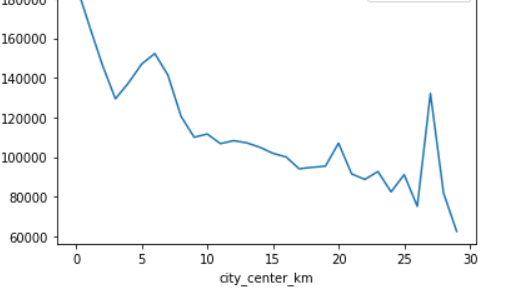        
      
Шаг 4.
        
5.	Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.
        

<div class="alert alert-danger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Стоит изучить записи, которые привели к провалу на 27-м км. (или выбросу (как на графике), если он вдруг появится после восстановления данных)
        


<div class="alert alert-danger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />         
Стоит посмотреть на количество квартир разных категорий (первый, последний, другой), которые продаются на 3-м км. и 5-ом ... и какую долю они занимают на каждом километре, чтобы объяснить пик  и провал в центре

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Графики и диаграммы добавил. На 27-ой, 3-ий и 5-ый км посмотрел 

## Шаг 5. Общий вывод

#### 5.1. Цель работы: 

По данным от Яндекс недвижимости выполнить предобработку данных и изучить их,   
чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости, а именно:
    
1. Изучить, как быстро продавались квартиры
2. Определить какие факторы больше всего влияют на общую (полную) стоимость объекта?
3. Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра. 
4. Найти закономерность между стоимостью объектов зависит от расстояния до центра города.

#### 5.2. Анализ и предобработка представленного датасета с данными о заемщиках банка с данными о недвижимости по Спб и Ленинградской области

В рамках предобработки данных были обнаружены следующие ошибки в датасете:
    
    1. Наименование столбца cityCenters_nearest несоответствует snake_case
    2. В столбцах  ceiling_height, living_area, is_apartment, kitchen_area, balcony, airports_nearest,  
    cityCenters_nearest, parks_around3000, parks_neares, ponds_around3000, ponds_nearest, first_day_exposition 
    имеют пропуски (значения NaN). Данные пропуски связаны как с человеческим фактором так и с ошибками в стороннем ПО 
    и сборе данных
    3. Наличие выбросов в датасете. Например явные ошибки при записи десятичных дробей в высоте пололков (25 вместо 2.5)
    4. Наличие неявных дубликатов в столбце locality_name. Например поселок городского типа Рябово и посёлок Рябово  
    5. Неверный тип переменных в столбцах. Например object в столбце is_apartament или float в столбце days_exposition 

В ходе предобработки данного датасета **были выполнены следующие действия:**  

1. Пропуски в столбцах где это возможно были заполнены медианным значением из соответствующих группc помощью логической индексации и метода  (например столбцы kitchen_area и living_area медианными значениями по группам по количеству комнат) .median()
2. Где это было логически обосновано, пропуски были заполнены нулями (например в столбце is_apartament и balcony)
3. Изменены типы столбцов is_apartament и balcony, first_day_exposition, floors_total, parks_around3000, ponds_around300
3. Обработаны неявные дубликаты в столбце locality_name: значения в столбце приведены к одному регистру с помощью метода .str.lower(), убраны наименования населенных пунктов.

Для дальнейшего анализа были добавлены столбцы:

 1. цена одного квадратного метра
 2. день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
 3. месяц публикации объявления
 4. год публикации объявления
 5. тип этажа квартиры (значения — «первый», «последний», «другой»)
 6. расстояние в км до центра города

После преобработки данных по каждому столбцу были построены гистограммы для визуализации результатов

В ходе дальнейшего анализа для определения факторов, влияющих на цену объекта недвижимости, была построена таблица корреляции ниже

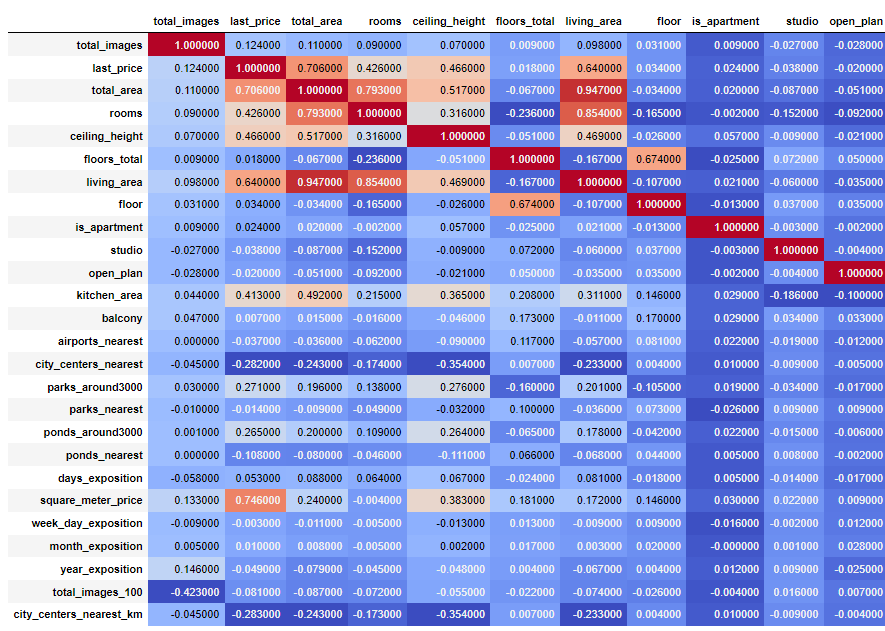

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Не стоит включать код в итоговый вывод, графики можно вставить при помощи снимков экрана
        
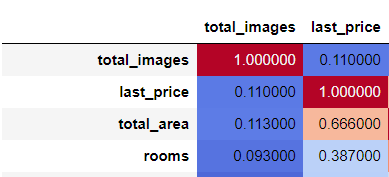        

Так же расчитаны средние цены квадратного метра по локациям объекта недвижимости 

и расчитана цена "километра" при приближении к центру Спб от окраинше всего влияют на общую (полную) стоимость объекта?

#### 5.3. Общий вывод

**Вывод по динамике продаж:**  
  
В среднем объекты недвижимости продаются от 45 до 167 дней. Медианное значение - 90 дней. Минимальное - 11 дней. Быстрыми считаются продажи меньше 45 дней. Долгими - больше 167 дней

**Вывод по факторам, влияющим на стоимость объекта недвижимости:**

На цену объекта недвижимости влияют:     
  
        - общая площадь (соответствено и жилая площадь, площадь кухни, количество комнат и цена м2)  
        - расстояние от центра 
        - год продажи 

Для двух последних даны графики ниже

**Цена - расстояние до центра**

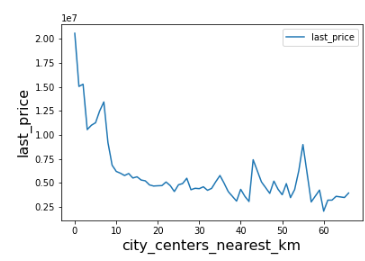

**Цена - год продажи**

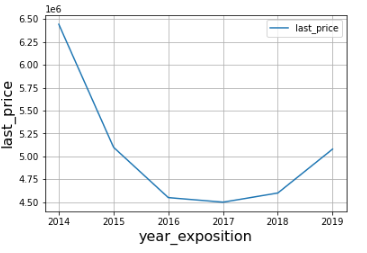

День и месяц практически не влияют на цену. В 2016-2018 годах наблюдается существенное снижение цен. Не смотря на то, что медианная цена на квартиры не на последнем и первом этаже больше, количество квартир на первом и последнем этажах мало, что не позволяет делать однозначный вывод

**Вывод по цене квадратного метра:**

Самые большие цены за м2 в Спб и  пригородах. Сводка с ценами за м2 дана в таблице ниже

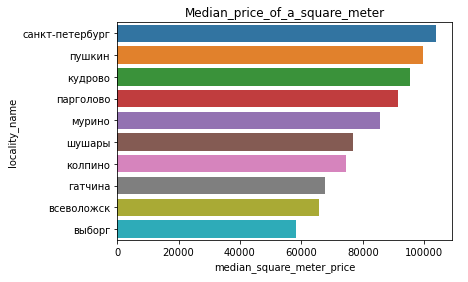

**Вывод по наличию закономерности между стоимости объектов и расстояния до центра города**:

C приближением к центру города стоимость квартиры увеличивается в среднем на ~125 тыс.руб за 1 км. 
Динамика изменения цены по км дана ниже

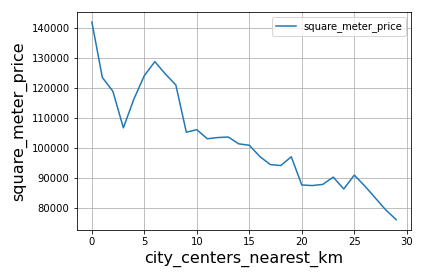

Провал на 3-ем километре объясняется тем, что квартир в категориях "первый этаж " или "последний этаж " на 3 км заметно больше. 
Всплеск 5-ом километре объясняется тем, что квартир в категории "другой" на 5 км заметно больше

<div class="alert alert-danger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Технически вывод хороший, есть сравнения показателей, инсайты, анализ рынка недвижимости, молодец
        
Осталось перепроверить итоговый вывод после исправления всех комментариев

<div class="alert alert-success">
<font size="5"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />    
Выполнил исследовательскую работу, молодец, показал хороший уровень навыков программирования
        
Критические ❌ комментарии

+ настроить загрузку сетевой версии        
+ проверить корректность заполнения пропусков синтетическими данными        
+ проверить и вернуть пропуски в колонку о расстоянии до центра
+ настроить фильтрацию редких значений в п. 2.4
+ добавить и подправить гистограммы в п.4.1
+ добавить графики в п. 4.3        
+ добавить вывод в п. 4.3
+ поправить выполнение и добавить график в ТОП-10
+ поправить выполнение и исследовать аномалии в п.4.5
+ поправить итоговый вывод
        
          
        
        
С ними важно поработать и исправить
        
Стоит обратить внимание и на такие комментарии ⚠️
        
Если будут вопросы про мои комментарии - задавай, если какой-то формат взаимодействия не устраивает или есть какие-то другие пожелания - пиши :)

<div class="alert alert-success">
    <font size="5"><b>Жду твой проект и твои комментарии 🤝</b></font><br />
    
нумерация пунктов из брифа проекта, у тебя они могут быть другие

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br />    
    
[Обработка пропусков в данных](https://loginom.ru/blog/missing)
    
<p> Доп. материал: методы группировки и расчета суммы, средних и т.д.:
        
[Подробное руководство по группировке и агрегированию с помощью pandas](https://dfedorov.spb.ru/pandas/%D0%9F%D0%BE%D0%B4%D1%80%D0%BE%D0%B1%D0%BD%D0%BE%D0%B5%20%D1%80%D1%83%D0%BA%D0%BE%D0%B2%D0%BE%D0%B4%D1%81%D1%82%D0%B2%D0%BE%20%D0%BF%D0%BE%20%D0%B3%D1%80%D1%83%D0%BF%D0%BF%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B5%20%D0%B8%20%D0%B0%D0%B3%D1%80%D0%B5%D0%B3%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8E%20%D1%81%20%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E%20pandas.html)
    
[Сводная таблица в pandas](https://dfedorov.spb.ru/pandas/%D0%A1%D0%B2%D0%BE%D0%B4%D0%BD%D0%B0%D1%8F%20%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D0%B0%20%D0%B2%20pandas.html?ysclid=lje9wz2vfc28794921)
        
[Понимание функции transform в Pandas](https://dfedorov.spb.ru/pandas/%D0%9F%D0%BE%D0%BD%D0%B8%D0%BC%D0%B0%D0%BD%D0%B8%D0%B5%20%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8%20transform%20%D0%B2%20Pandas.html)
    
[Как выбрать определенные столбцы из DataFrame](https://dfedorov.spb.ru/pandas/03.%20%D0%9A%D0%B0%D0%BA%20%D0%B2%D1%8B%D0%B1%D1%80%D0%B0%D1%82%D1%8C%20%D0%BF%D0%BE%D0%B4%D0%BC%D0%BD%D0%BE%D0%B6%D0%B5%D1%81%D1%82%D0%B2%D0%BE%20%D0%B8%D0%B7%20DataFrame_.html?ysclid=l9sps5lt6g576766938)
    
[How to visualise data using histograms in Pandas](https://practicaldatascience.co.uk/data-science/how-to-visualise-data-using-histograms-in-pandas)

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод